In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

In [ ]:
!wget $data

--2025-10-08 10:48:30--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.1’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.05s   

2025-10-08 10:48:30 (17.3 MB/s) - ‘car_fuel_efficiency.csv.1’ saved [874188/874188]



In [ ]:
df = pd.read_csv(data)

df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   num_cylinders        9222 non-null   float64
 2   horsepower           8996 non-null   float64
 3   vehicle_weight       9704 non-null   float64
 4   acceleration         8774 non-null   float64
 5   model_year           9704 non-null   int64  
 6   origin               9704 non-null   object 
 7   fuel_type            9704 non-null   object 
 8   drivetrain           9704 non-null   object 
 9   num_doors            9202 non-null   float64
 10  fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 834.1+ KB


In [ ]:
features = list(df.columns.drop(['num_cylinders', 'acceleration', 'origin', 'drivetrain', 'num_doors' ]))

features

['engine_displacement',
 'horsepower',
 'vehicle_weight',
 'model_year',
 'fuel_type',
 'fuel_efficiency_mpg']

In [ ]:
df = df[features]

df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_type,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,Gasoline,13.231729
1,130,97.0,3149.664934,2007,Gasoline,13.688217
2,170,78.0,3079.038997,2018,Gasoline,14.246341
3,220,NaN,2542.392402,2009,Diesel,16.912736
4,210,140.0,3460.870990,2009,Gasoline,12.488369
...,...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,Diesel,15.101802
9700,180,154.0,2439.525729,2004,Gasoline,17.962326
9701,220,138.0,2583.471318,2008,Diesel,17.186587
9702,230,177.0,2905.527390,2011,Diesel,15.331551


In [ ]:
df.isna().sum()

,0
engine_displacement,0
horsepower,708
vehicle_weight,0
model_year,0
fuel_type,0
fuel_efficiency_mpg,0


In [ ]:
df.horsepower.median()

149.0

In [ ]:
df.nunique()

,0
engine_displacement,36
horsepower,192
vehicle_weight,9704
model_year,24
fuel_type,2
fuel_efficiency_mpg,9704


<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

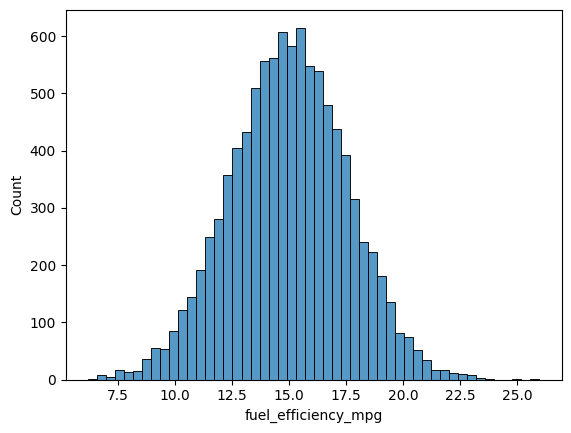

In [ ]:
sns.histplot(df.fuel_efficiency_mpg, bins = 50)

This is not a long tail but a normal distribution.

In [ ]:
df.fuel_efficiency_mpg.max()

25.96722204888372

In [ ]:
n = len(df)
n_test = int(n * 0.2)
n_val = int(n * 0.2)
n_train = n - n_test - n_val

n_train, n_val, n_test

(5824, 1940, 1940)

In [ ]:
idx = np.arange(n)

idx

array([   0,    1,    2, ..., 9701, 9702, 9703])

In [ ]:
np.random.seed(42)
np.random.shuffle(idx)

idx

array([ 483, 7506, 8795, ..., 5390,  860, 7270])

In [ ]:
train_df = df.iloc[idx[:n_train]]
val_df = df.iloc[idx[n_train:n_train + n_val]]
test_df = df.iloc[idx[n_train +n_val:]]

In [ ]:
train_df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_type,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,Gasoline,16.642943
7506,160,141.0,2741.170484,2019,Diesel,16.298377
8795,230,155.0,2471.880237,2017,Diesel,18.591822
1688,150,206.0,3748.164469,2015,Gasoline,11.818843
6217,300,111.0,2135.716359,2006,Gasoline,19.402209
...,...,...,...,...,...,...
1696,260,139.0,2606.972984,2009,Gasoline,16.964054
5685,280,132.0,4004.214323,2014,Diesel,10.059094
6735,210,152.0,2500.175687,2020,Gasoline,17.593237
2052,250,154.0,2254.313245,2002,Gasoline,18.925748


In [ ]:
val_df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_type,fuel_efficiency_mpg
6163,180,112.0,2772.134410,2020,Gasoline,15.366341
3313,260,138.0,3014.061530,2022,Gasoline,14.601182
4781,140,181.0,3652.186151,2016,Diesel,12.247032
8210,270,105.0,2753.040847,2023,Gasoline,15.136400
6713,170,224.0,4163.375137,2003,Gasoline,10.340419
...,...,...,...,...,...,...
7802,290,205.0,3403.401496,2019,Gasoline,13.868607
6780,200,159.0,2752.516039,2009,Gasoline,15.665403
7541,230,202.0,3303.000688,2008,Diesel,13.613127
1577,220,169.0,3293.420251,2008,Diesel,13.733343


In [ ]:
test_df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_type,fuel_efficiency_mpg
3729,140,148.0,2704.826005,2017,Diesel,15.804354
7764,210,136.0,3001.227490,2004,Diesel,14.272374
4358,210,152.0,3747.467392,2021,Gasoline,11.748441
5922,190,128.0,2705.833636,2014,Diesel,16.485991
1343,230,156.0,2505.939657,2005,Diesel,17.779704
...,...,...,...,...,...,...
5734,210,163.0,1972.029124,2011,Diesel,19.961672
5191,160,126.0,3011.588014,2009,Diesel,14.651056
5390,290,187.0,2440.508039,2019,Gasoline,18.404435
860,260,129.0,1865.404480,2019,Gasoline,20.502460


In [ ]:
len(train_df), len(val_df), len(test_df)

(5824, 1940, 1940)

In [ ]:
train_df = train_df.reset_index(drop =True)
val_df = val_df.reset_index(drop = True)
test_df = test_df.reset_index(drop = True)

In [ ]:
train_df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_type,fuel_efficiency_mpg
0,220,144.0,2535.887591,2009,Gasoline,16.642943
1,160,141.0,2741.170484,2019,Diesel,16.298377
2,230,155.0,2471.880237,2017,Diesel,18.591822
3,150,206.0,3748.164469,2015,Gasoline,11.818843
4,300,111.0,2135.716359,2006,Gasoline,19.402209
...,...,...,...,...,...,...
5819,260,139.0,2606.972984,2009,Gasoline,16.964054
5820,280,132.0,4004.214323,2014,Diesel,10.059094
5821,210,152.0,2500.175687,2020,Gasoline,17.593237
5822,250,154.0,2254.313245,2002,Gasoline,18.925748


In [ ]:
val_df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_type,fuel_efficiency_mpg
0,180,112.0,2772.134410,2020,Gasoline,15.366341
1,260,138.0,3014.061530,2022,Gasoline,14.601182
2,140,181.0,3652.186151,2016,Diesel,12.247032
3,270,105.0,2753.040847,2023,Gasoline,15.136400
4,170,224.0,4163.375137,2003,Gasoline,10.340419
...,...,...,...,...,...,...
1935,290,205.0,3403.401496,2019,Gasoline,13.868607
1936,200,159.0,2752.516039,2009,Gasoline,15.665403
1937,230,202.0,3303.000688,2008,Diesel,13.613127
1938,220,169.0,3293.420251,2008,Diesel,13.733343


In [ ]:
test_df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_type,fuel_efficiency_mpg
0,140,148.0,2704.826005,2017,Diesel,15.804354
1,210,136.0,3001.227490,2004,Diesel,14.272374
2,210,152.0,3747.467392,2021,Gasoline,11.748441
3,190,128.0,2705.833636,2014,Diesel,16.485991
4,230,156.0,2505.939657,2005,Diesel,17.779704
...,...,...,...,...,...,...
1935,210,163.0,1972.029124,2011,Diesel,19.961672
1936,160,126.0,3011.588014,2009,Diesel,14.651056
1937,290,187.0,2440.508039,2019,Gasoline,18.404435
1938,260,129.0,1865.404480,2019,Gasoline,20.502460


In [ ]:
y_train = train_df.fuel_efficiency_mpg
y_val = val_df.fuel_efficiency_mpg
y_test = test_df.fuel_efficiency_mpg

In [ ]:
del train_df['fuel_efficiency_mpg']
del val_df['fuel_efficiency_mpg']
del test_df['fuel_efficiency_mpg']

In [ ]:
train_df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_type
0,220,144.0,2535.887591,2009,Gasoline
1,160,141.0,2741.170484,2019,Diesel
2,230,155.0,2471.880237,2017,Diesel
3,150,206.0,3748.164469,2015,Gasoline
4,300,111.0,2135.716359,2006,Gasoline
...,...,...,...,...,...
5819,260,139.0,2606.972984,2009,Gasoline
5820,280,132.0,4004.214323,2014,Diesel
5821,210,152.0,2500.175687,2020,Gasoline
5822,250,154.0,2254.313245,2002,Gasoline


In [ ]:
val_df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_type
0,180,112.0,2772.134410,2020,Gasoline
1,260,138.0,3014.061530,2022,Gasoline
2,140,181.0,3652.186151,2016,Diesel
3,270,105.0,2753.040847,2023,Gasoline
4,170,224.0,4163.375137,2003,Gasoline
...,...,...,...,...,...
1935,290,205.0,3403.401496,2019,Gasoline
1936,200,159.0,2752.516039,2009,Gasoline
1937,230,202.0,3303.000688,2008,Diesel
1938,220,169.0,3293.420251,2008,Diesel


In [ ]:
test_df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_type
0,140,148.0,2704.826005,2017,Diesel
1,210,136.0,3001.227490,2004,Diesel
2,210,152.0,3747.467392,2021,Gasoline
3,190,128.0,2705.833636,2014,Diesel
4,230,156.0,2505.939657,2005,Diesel
...,...,...,...,...,...
1935,210,163.0,1972.029124,2011,Diesel
1936,160,126.0,3011.588014,2009,Diesel
1937,290,187.0,2440.508039,2019,Gasoline
1938,260,129.0,1865.404480,2019,Gasoline


In [ ]:
df.model_year.max()

2023

In [ ]:
def prepare_X_mean(data):
    df = data.copy()
    features_new = features.copy()
    df['age'] = 2023 - df.model_year
    features_new.append('age')

    for v in ['Diesel', 'Gasoline']:
        df[f'fuel_type_{v.lower()}'] = (df.fuel_type == v).astype('int')
        features_new.append(f'fuel_type_{v.lower()}')

    if 'fuel_type' in df.columns:
        del df['fuel_type']
        features_new.remove('fuel_type')

    if 'fuel_efficiency_mpg' in features_new:
        features_new.remove('fuel_efficiency_mpg')

    mean_value = df[features_new].mean()
    df_num = df[features_new].fillna(mean_value)
    if 'model_year' in df_num.columns:
      del df_num['model_year']
    X = df_num.values
    return X

In [ ]:
def prepare_X_zero(data):
    df = data.copy()
    features_new = features.copy()
    df['age'] = 2023 - df.model_year
    features_new.append('age')

    for v in ['Diesel', 'Gasoline']:
        df[f'fuel_type_{v.lower()}'] = (df.fuel_type == v).astype('int')
        features_new.append(f'fuel_type_{v.lower()}')

    if 'fuel_type' in df.columns:
        del df['fuel_type']
        features_new.remove('fuel_type')

    if 'fuel_efficiency_mpg' in features_new:
        features_new.remove('fuel_efficiency_mpg')

    df_num = df[features_new]
    df_num = df[features_new].fillna(0)
    if 'model_year' in df_num.columns:
      del df_num['model_year']
    X = df_num.values
    return X

In [ ]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X]) #This is to create a colum of ones in the position 0 of X

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)


    return w_full[0], w_full[1:] # bias, weights

In [ ]:
def rmse(y, y_pred):
    squared_error = (y - y_pred) ** 2
    mse = squared_error.mean()
    return np.sqrt(mse)

In [ ]:
X_train = prepare_X_mean(train_df)
w0, w = train_linear_regression(X_train, y_train)

In [ ]:
X_train

array([[2.20000000e+02, 1.44000000e+02, 2.53588759e+03, 1.40000000e+01,
        0.00000000e+00, 1.00000000e+00],
       [1.60000000e+02, 1.41000000e+02, 2.74117048e+03, 4.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.30000000e+02, 1.55000000e+02, 2.47188024e+03, 6.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       ...,
       [2.10000000e+02, 1.52000000e+02, 2.50017569e+03, 3.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.50000000e+02, 1.54000000e+02, 2.25431324e+03, 2.10000000e+01,
        0.00000000e+00, 1.00000000e+00],
       [2.10000000e+02, 1.52000000e+02, 2.43520361e+03, 1.90000000e+01,
        1.00000000e+00, 0.00000000e+00]])

In [ ]:
w0, w

(np.float64(-36.77525098350368),
 array([ 1.05772729e-03,  1.33217509e-02, -4.84887610e-03,  5.55651179e-03,
         8.97174142e+01,  8.12794286e+01]))

In [ ]:
y_pred = w0 + X_train.dot(w)

y_pred

array([34.43679616, 41.7203964 , 43.29780989, ..., 34.64483386,
       36.00596019, 43.48676519])

In [ ]:
train_score = rmse(y_train, y_pred)

print(round(train_score, 2))

21.79


In [ ]:
X_val = prepare_X_zero(val_df)
yval_pred = w0 + X_val.dot(w)

val_score = rmse(y_val, yval_pred)

print(round(val_score, 2))

21.87


In [ ]:
def train_linear_regression_reg(X, y, r = 0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X]) #This is to create a colum of ones in the position 0 of X

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])  #Regularization
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)


    return w_full[0], w_full[1:] # bias, weights

In [ ]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X_zero(train_df)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X_zero(val_df)
    yval_pred = w0 + X_val.dot(w)
    score = rmse(y_val, yval_pred)

    print(f'r = {round(r, 2)}, w0 = {round(w0, 2)}, scores = {round(score, 2)}')

r = 0, w0 = 29.6, scores = 0.51
r = 0.01, w0 = 29.59, scores = 0.51
r = 0.1, w0 = 29.56, scores = 0.51
r = 1, w0 = 29.27, scores = 0.51
r = 5, w0 = 28.02, scores = 0.54
r = 10, w0 = 26.61, scores = 0.61
r = 100, w0 = 13.95, scores = 1.92


In [ ]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X_mean(train_df)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X_mean(val_df)
    yval_pred = w0 + X_val.dot(w)
    score = rmse(y_val, yval_pred)

    print(f'r = {round(r, 2)}, w0 = {round(w0, 2)}, scores = {round(score, 2)}')

r = 0, w0 = -36.78, scores = 22.01
r = 0.01, w0 = 18.96, scores = 0.46
r = 0.1, w0 = 18.95, scores = 0.46
r = 1, w0 = 18.78, scores = 0.47
r = 5, w0 = 18.08, scores = 0.49
r = 10, w0 = 17.27, scores = 0.55
r = 100, w0 = 9.56, scores = 1.67


This confirms that filling the missing values with the mean was the right choice.

In [ ]:
def prepare_X_zero(data):
    df = data.copy()
    features_new = features.copy()
    df['age'] = 2023 - df.model_year
    features_new.append('age')

    for v in ['Diesel']:
        df[f'fuel_type_{v.lower()}'] = (df.fuel_type == v).astype('int')
        features_new.append(f'fuel_type_{v.lower()}')

    if 'fuel_type' in df.columns:
        del df['fuel_type']
        features_new.remove('fuel_type')

    if 'fuel_efficiency_mpg' in features_new:
        features_new.remove('fuel_efficiency_mpg')

    df_num = df[features_new]
    df_num = df[features_new].fillna(0)
    if 'model_year' in df_num.columns:
      del df_num['model_year']
    X = df_num.values
    return X

I edited the function "prepare_X_zero" because of redundant dummy variable out of fuel_type_diesel and fuel_type_gasoline


In [ ]:
rmses = []

for i in range(10):
  np.random.seed(i)

  idx = np.arange(n)
  np.random.shuffle(idx)

  train_df = df.iloc[idx[:n_train]]
  val_df = df.iloc[idx[n_train:n_train + n_val]]
  test_df = df.iloc[idx[n_train + n_val:]]

  y_train = train_df.fuel_efficiency_mpg
  y_val = val_df.fuel_efficiency_mpg
  y_test = test_df.fuel_efficiency_mpg

  del train_df['fuel_efficiency_mpg']
  del val_df['fuel_efficiency_mpg']
  del test_df['fuel_efficiency_mpg']

  X_train = prepare_X_zero(train_df)
  w0, w = train_linear_regression(X_train, y_train)

  X_val = prepare_X_zero(val_df)
  yval_pred = w0 + X_val.dot(w)
  score = rmse(y_val, yval_pred)

  rmses.append(score)
  print(f"Seed: {i} RMSE: {score:.3f}")

std_value = np.std(rmses)
print(f"\nStandard deviation of RMSEs: {round(std_value, 3)}")

Seed: 0 RMSE: 0.521
Seed: 1 RMSE: 0.521
Seed: 2 RMSE: 0.523
Seed: 3 RMSE: 0.516
Seed: 4 RMSE: 0.511
Seed: 5 RMSE: 0.529
Seed: 6 RMSE: 0.531
Seed: 7 RMSE: 0.509
Seed: 8 RMSE: 0.515
Seed: 9 RMSE: 0.513

Standard deviation of RMSEs: 0.007


In [ ]:
rmses = []

for i in range(10):
  np.random.seed(i)

  idx = np.arange(n)
  np.random.shuffle(idx)

  train_df = df.iloc[idx[:n_train]]
  val_df = df.iloc[idx[n_train:n_train + n_val]]
  test_df = df.iloc[idx[n_train + n_val:]]

  y_train = train_df.fuel_efficiency_mpg
  y_val = val_df.fuel_efficiency_mpg
  y_test = test_df.fuel_efficiency_mpg

  del train_df['fuel_efficiency_mpg']
  del val_df['fuel_efficiency_mpg']
  del test_df['fuel_efficiency_mpg']

  df_full_train = pd.concat([train_df, val_df])
  df_full_train = df_full_train.reset_index(drop = True)
  y_full_train = pd.concat([y_train, y_val])


  X_full_train = prepare_X_zero(df_full_train)
  w0, w = train_linear_regression_reg(X_full_train, y_full_train, r = 0.001)

  X_test = prepare_X_zero(test_df)
  ytest_pred = w0 + X_val.dot(w)
  score = rmse(y_val, ytest_pred)

  rmses.append(score)
  print(f"Seed: {i} RMSE: {score:.3f}")



Seed: 0 RMSE: 3.487
Seed: 1 RMSE: 3.461
Seed: 2 RMSE: 3.429
Seed: 3 RMSE: 3.588
Seed: 4 RMSE: 3.513
Seed: 5 RMSE: 3.470
Seed: 6 RMSE: 3.503
Seed: 7 RMSE: 3.465
Seed: 8 RMSE: 3.472
Seed: 9 RMSE: 0.513
